In [2]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score  #calculate accuracy
from hog import preprocessing
import deepchecks
from deepchecks.tabular import suites
import matplotlib.pyplot as plt

In [3]:
path = "D:\GitHub\ML-analysis\dataset"
data_train, label_train, data_test, label_test = preprocessing(path)

In [4]:
def _transform_data(data, labels):
    #Generate input array X
    X = np.array(data)

    #Generate output array y
    lbe = LabelEncoder()
    lbe.fit(labels)
    y = lbe.transform(labels)

    return X, y

In [5]:
#poly kernel
X_train , y_train = _transform_data(data_train, label_train)
X_test , y_test = _transform_data(data_test, label_test)

In [6]:
model = svm.SVC(kernel='poly', degree = 3, gamma= 0.1,C=75, coef0=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75,stratify=y, random_state=42)
model.fit(X_train,y_train)

SVC(C=75, coef0=1, gamma=0.1, kernel='poly')

In [ ]:
prediction = model.predict(X_test)

In [7]:
confusion_matrix = confusion_matrix(y_test, prediction)

In [8]:
print("Accuracy: ", metrics.accuracy_score(y_test, prediction)*100)

Accuracy:  74.4


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

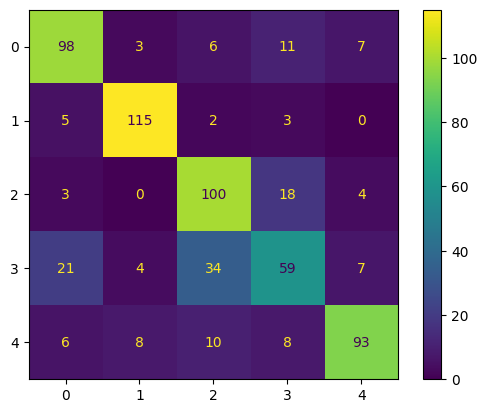

In [9]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, True])
cm_display.plot()
plt.show()

In [11]:
F1 = f1_score(y_test, prediction,average=None)

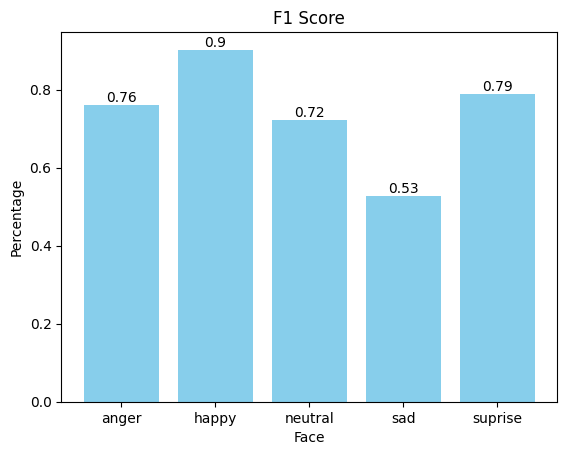

In [16]:
face = ['anger', 'happy', 'neutral', 'sad', 'suprise']

# Create a bar chart
bars = plt.bar(face, F1, color='skyblue')

# Add labels and title
plt.xlabel('Face')
plt.ylabel('Percentage')
plt.title('F1 Score')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
# Show the bar chart
plt.show()

In [ ]:
metrics.recall_score(y_test, prediction)

In [ ]:
metrics.precision_score(y_test, prediction)